In [1]:
!pip install -U keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [5]:
# Generate time series Sequence
np.random.seed(0)
timesteps = 100
time = np.arange(0,timesteps,1)
series = np.sin(0.1 * time) + np.random.normal(scale=0.1, size = timesteps)



In [6]:
# Create input Output pairs
X = series[:-1].reshape(1,timesteps-1,1)
y = series[1:].reshape(1,timesteps-1,1)

In [7]:
# Build one-to one model
model = Sequential()
model.add(SimpleRNN(10,input_shape= (None,1),return_sequences=True))
model.add(Dense(1))

In [8]:
# Compile the model
model.compile(optimizer='adam',loss='mse')

In [9]:
# Train model
model.fit(X,y, epochs=50)

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 1.4118
Epoch 2/50
1/1 [==============================] - 0s 65ms/step - loss: 1.3580
Epoch 3/50
1/1 [==============================] - 0s 61ms/step - loss: 1.3056
Epoch 4/50
1/1 [==============================] - 0s 68ms/step - loss: 1.2546
Epoch 5/50
1/1 [==============================] - 0s 68ms/step - loss: 1.2048
Epoch 6/50
1/1 [==============================] - 0s 82ms/step - loss: 1.1565
Epoch 7/50
1/1 [==============================] - 0s 81ms/step - loss: 1.1097
Epoch 8/50
1/1 [==============================] - 0s 61ms/step - loss: 1.0644
Epoch 9/50
1/1 [==============================] - 0s 69ms/step - loss: 1.0207
Epoch 10/50
1/1 [==============================] - 0s 66ms/step - loss: 0.9784
Epoch 11/50
1/1 [==============================] - 0s 60ms/step - loss: 0.9376
Epoch 12/50
1/1 [==============================] - 0s 63ms/step - loss: 0.8982
Epoch 13/50
1/1 [==============================] - 0s 57ms/step

In [10]:
# Generte prediction
X_new = series.reshape(1,timesteps,1)
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 156ms/step


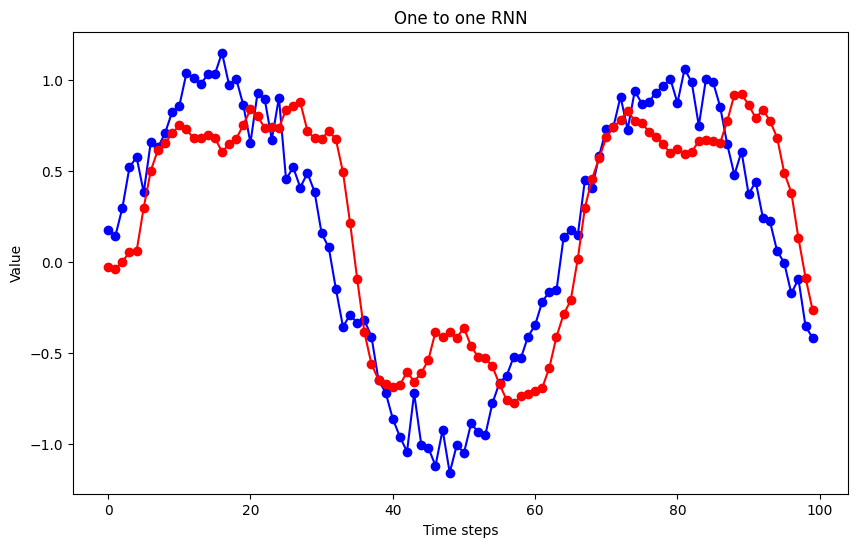

In [16]:
# Plot the result
plt.figure(figsize=(10,6))
plt.plot(time, series, marker='o', label='Orginal Series', linestyle = '-', color='b')
plt.plot(time, y_pred.flatten(), marker='o', label='Predicted Series', linestyle='-', color='r')
plt.title('One to one RNN')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.legend
plt.show()